In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv("telcoCustomerChurn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Valores ausentes antes do tratamento:")
print(df.isnull().sum())

Valores ausentes antes do tratamento:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [4]:
# removendo valores ausentes
# Colunas: TotalCharges e tenure
df.dropna(subset=['TotalCharges', 'tenure'], inplace=True)

In [5]:
print("\nValores ausentes após o tratamento:")
print(df.isnull().sum())


Valores ausentes após o tratamento:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
# selecionando as variaveis para o modelo
# Variavel independente (preditora)
X = df[['tenure']]

In [8]:
# Variavel dependente (alvo)
y = df['TotalCharges']

In [9]:
# Dividir os dados em conjuntos de treino e teste
# 80% para treino, 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(f"\nFormato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")


Formato de X_train: (5625, 1)
Formato de X_test: (1407, 1)
Formato de y_train: (5625,)
Formato de y_test: (1407,)


In [11]:
# criar e treinar o modelo de Regressao Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Fazer previsoes com o conjunto de teste
y_pred = model.predict(X_test)

In [13]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"\nCoeficiente (inclinação ou 'm'): {model.coef_[0]}")
print(f"Intercepto ('b'): {model.intercept_}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


Coeficiente (inclinação ou 'm'): 76.18593839170585
Intercepto ('b'): -188.19345605578837
Erro Quadrático Médio (MSE): 1623839.4045774264
Coeficiente de Determinação (R²): 0.6857624208428289


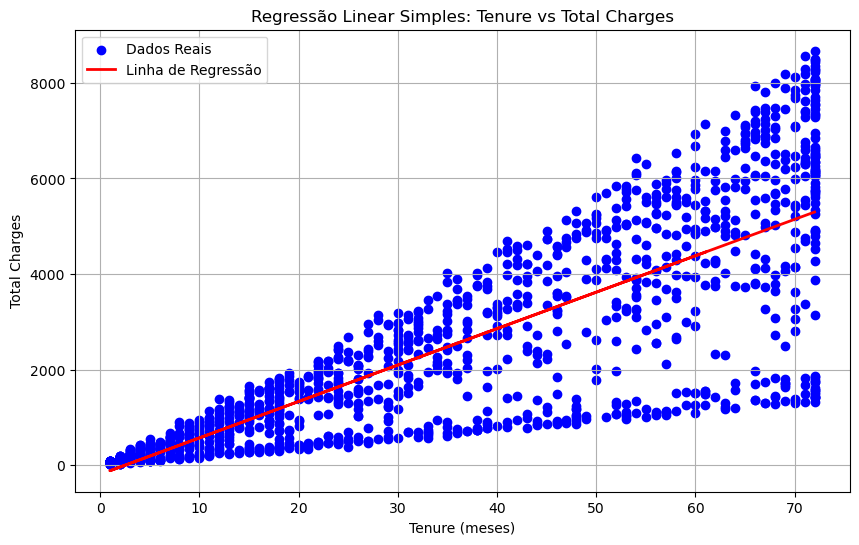

In [15]:
# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel("Tenure (meses)")
plt.ylabel("Total Charges")
plt.title("Regressão Linear Simples: Tenure vs Total Charges")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
print("\nEstatísticas descritivas das colunas numéricas:")
print(df.describe())


Estatísticas descritivas das colunas numéricas:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [18]:
print("\nValores únicos em cada coluna (para identificar categóricas):")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos") # This can be very verbose
    print(df.nunique().sort_values())


Valores únicos em cada coluna (para identificar categóricas):
customerID: 7032 valores únicos
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                72
MonthlyCharges      1584
TotalCharges        6530
customerID          7032
dtype: int64
gender: 2 valores únicos
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService  

In [19]:
# Converter 'TotalCharges' para numérico. Espaços vazios se tornarão NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [20]:

# Lidar com valores ausentes em 'TotalCharges'
# Opção: preencher com a mediana (mais robusto a outliers que a média)
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)
print(f"\nValores ausentes em 'TotalCharges' após preenchimento: {df['TotalCharges'].isnull().sum()}")



Valores ausentes em 'TotalCharges' após preenchimento: 0


In [21]:
# Converter a coluna alvo 'Churn' para numérica (0 ou 1)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print("\nDistribuição da variável alvo 'Churn':")
print(df['Churn'].value_counts(normalize=True))


Distribuição da variável alvo 'Churn':
0    0.734215
1    0.265785
Name: Churn, dtype: float64


In [22]:
# Remover 'customerID' pois não é útil para a predição
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

In [23]:
# Identificar features numéricas e categóricas
# Excluindo a coluna alvo 'Churn' das features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'Churn' in numerical_features: # Ensure Churn is not accidentally included
    numerical_features.remove('Churn')

In [24]:
categorical_features = df.select_dtypes(include='object').columns.tolist()

In [25]:
print(f"\nFeatures Numéricas: {numerical_features}")
print(f"\nFeatures Categóricas: {categorical_features}")


Features Numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Features Categóricas: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [26]:
# Definir X (features) e y (alvo)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [27]:
# Criar transformadores para pré-processamento
# Para features numéricas: escalonamento padrão
numerical_transformer = StandardScaler()

In [28]:
# Para features categóricas: One-Hot Encoding
# handle_unknown='ignore' para evitar erros se categorias raras aparecerem no teste
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False) # CORRIGIDO AQUI


In [29]:
# Combinar transformadores usando ColumnTransformer
# Certifique-se de que as listas de features não estão vazias antes de criar os transformadores
transformers_list = []
if numerical_features:
    transformers_list.append(('num', numerical_transformer, numerical_features))
if categorical_features:
    transformers_list.append(('cat', categorical_transformer, categorical_features))

if not transformers_list:
    raise ValueError("No features selected for preprocessing. Check numerical_features and categorical_features lists.")

preprocessor = ColumnTransformer(
    transformers=transformers_list,
    remainder='passthrough'
)

In [30]:
# --- 3. Dividir Dados em Treino e Teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y é importante para problemas de classificação desbalanceados,
# garantindo proporções similares da classe alvo nos conjuntos de treino e teste.

print(f"\nFormato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")


Formato de X_train: (5625, 19)
Formato de X_test: (1407, 19)


In [31]:
# --- 4 & 5. Criar Pipeline com Pré-processamento e Treinar Modelo ---
# O pipeline aplicará o pré-processamento e depois treinará o modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'))])
# solver='liblinear' é bom para datasets menores e problemas binários.
# class_weight='balanced' ajuda a lidar com desbalanceamento na variável alvo 'Churn'.


In [32]:
model.fit(X_train, y_train)
print("\nModelo treinado com sucesso!")


Modelo treinado com sucesso!


In [33]:
# --- 6. Fazer Previsões ---
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidades para a classe positiva (Churn=1)


In [34]:
# --- 7. Avaliar o Modelo ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [35]:
print("\n--- Resultados da Avaliação do Modelo de Regressão Logística ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}") # TP / (TP + FP)
print(f"Recall (Sensibilidade): {recall:.4f}") # TP / (TP + FN)
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Não Churn (0)', 'Churn (1)']))

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


--- Resultados da Avaliação do Modelo de Regressão Logística ---
Acurácia: 0.7249
Precisão: 0.4893
Recall (Sensibilidade): 0.7941
F1-Score: 0.6055
ROC AUC Score: 0.8354

Relatório de Classificação:
               precision    recall  f1-score   support

Não Churn (0)       0.90      0.70      0.79      1033
    Churn (1)       0.49      0.79      0.61       374

     accuracy                           0.72      1407
    macro avg       0.70      0.75      0.70      1407
 weighted avg       0.79      0.72      0.74      1407


Matriz de Confusão:
[[723 310]
 [ 77 297]]


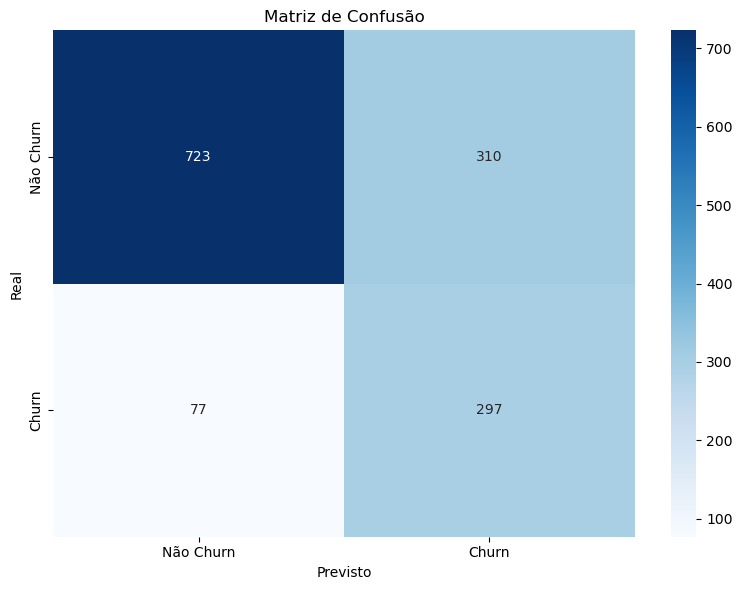

In [36]:
# Visualizar Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig("confusion_matrix.png") # Save the plot
plt.show()


Coeficientes do Modelo (Importância das Features para Churn - ordenado por valor absoluto):
                                 Feature  Coefficient
25                     Contract_Two year    -1.457925
1                                 tenure    -1.254050
10           InternetService_Fiber optic     1.062993
24                     Contract_One year    -0.790138
3                           TotalCharges     0.608874
28        PaymentMethod_Electronic check     0.406884
2                         MonthlyCharges    -0.400617
7                       PhoneService_Yes    -0.396985
13                    OnlineSecurity_Yes    -0.362960
21                       StreamingTV_Yes     0.357291
23                   StreamingMovies_Yes     0.342597
9                      MultipleLines_Yes     0.322374
19                       TechSupport_Yes    -0.320612
26                  PaperlessBilling_Yes     0.253421
6                         Dependents_Yes    -0.227245
18       TechSupport_No internet service   

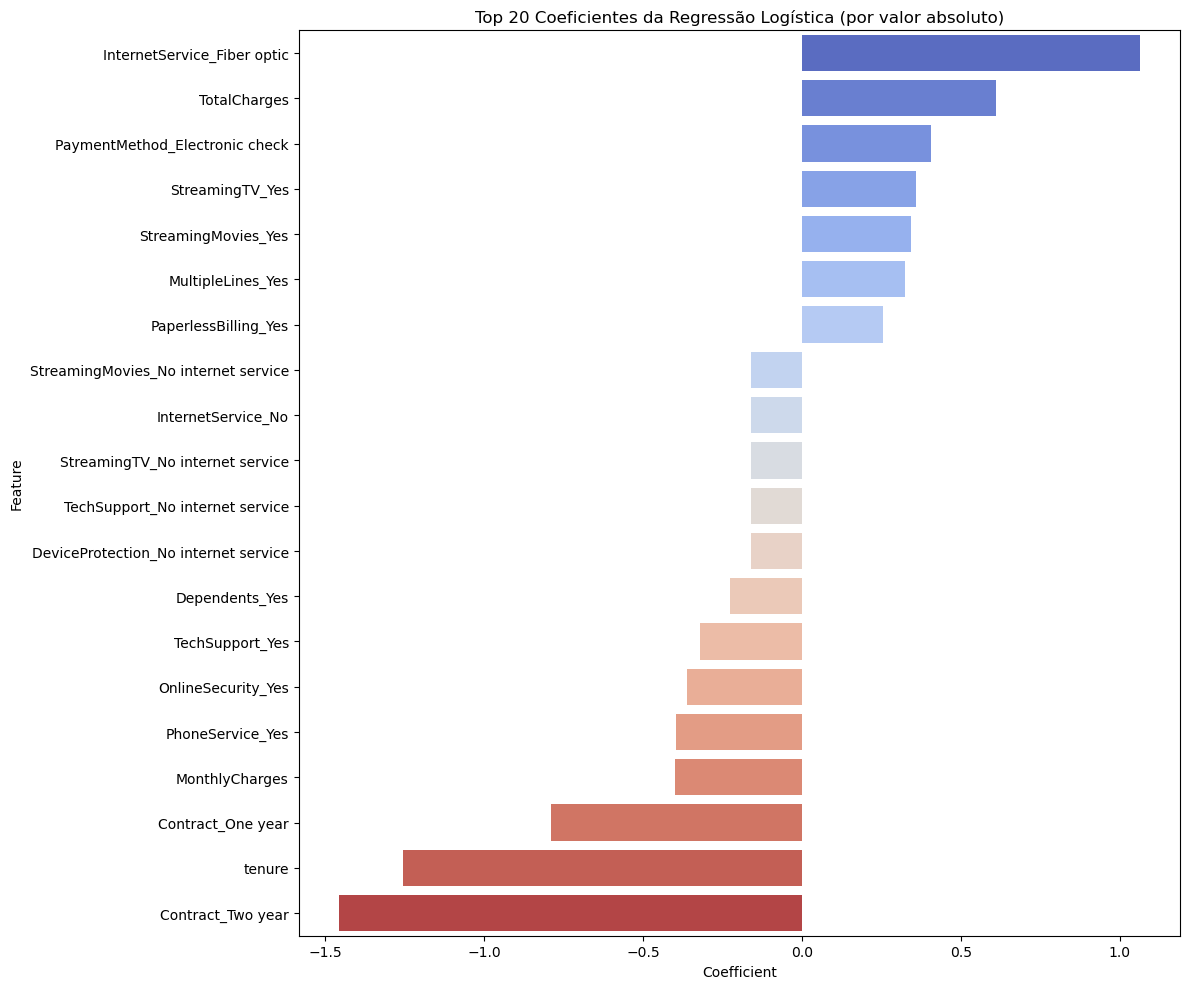

In [37]:
# Obter os nomes das features após o OneHotEncoding para análise de coeficientes
try:
    # Acessar o transformador OneHotEncoder treinado dentro do ColumnTransformer
    one_hot_encoder_transformer = model.named_steps['preprocessor'].named_transformers_['cat']
    one_hot_encoder_feature_names = one_hot_encoder_transformer.get_feature_names_out(categorical_features)
    
    # Nomes finais das features
    all_feature_names = numerical_features + list(one_hot_encoder_feature_names)

    # Coeficientes do modelo
    if hasattr(model.named_steps['classifier'], 'coef_'):
        coefficients = model.named_steps['classifier'].coef_[0]
        
        if len(all_feature_names) == len(coefficients):
            coef_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
            coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False) # Sort by absolute value for importance
            print("\nCoeficientes do Modelo (Importância das Features para Churn - ordenado por valor absoluto):")
            print(coef_df.head(20)) # Print top 20 most important features

            # Visualizar os coeficientes mais importantes
            plt.figure(figsize=(12, 10))
            # Plotar apenas os N mais importantes (valor absoluto)
            top_n_abs = 20
            important_coefs_abs = coef_df.head(top_n_abs).sort_values(by='Coefficient', ascending=False) # Sort for plotting
            
            sns.barplot(x='Coefficient', y='Feature', data=important_coefs_abs, palette="coolwarm")
            plt.title(f'Top {top_n_abs} Coeficientes da Regressão Logística (por valor absoluto)')
            plt.tight_layout() # Adjust layout
            plt.savefig("coefficients_plot.png") # Save the plot
            plt.show()
        else:
            print(f"\nErro: Número de nomes de features ({len(all_feature_names)}) não corresponde ao número de coeficientes ({len(coefficients)}).")
            print("Nomes de features numéricas:", numerical_features)
            print("Nomes de features categóricas originais:", categorical_features)
            print("Nomes de features após OneHotEncoding (pode estar incompleto ou com problema):", list(one_hot_encoder_feature_names if 'one_hot_encoder_feature_names' in locals() else []))


except KeyError as e:
    print(f"\nNão foi possível obter os nomes das features do OneHotEncoder. Erro: {e}")
    print("Isso pode acontecer se não houver features categóricas ou se o nome do transformador 'cat' estiver incorreto.")
except Exception as e:
    print(f"\nOcorreu um erro ao tentar exibir os coeficientes: {e}")